In [ ]:
!pip install llama-parse
!pip install llama-index-core
!wget -O attention_is_all_you_need.pdf https://arxiv.org/pdf/1706.03762

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
import os
import nest_asyncio

nest_asyncio.apply()

os.environ['LLAMA_CLOUD_API_KEY'] = "llx-...."


In [ ]:
from llama_parse import LlamaParse
from llama_index.core.schema import ImageDocument
from typing import List
import glob



ins = """
You are a highly proficient language model designed to convert pages from PDF, PPT and other files into structured markdown text. Your goal is to accurately transcribe text, represent formulas in LaTeX MathJax notation, and identify and describe images, particularly graphs and other graphical elements.

You have been tasked with creating a markdown copy of each page from the provided PDF or PPT image. Each image description must include a full description of the content, a summary of the graphical object.

Maintain the sequence of all the elements.

For the following element, follow the requirement of extraction:
for Text:
   - Extract all readable text from the page.
   - Exclude any diagonal text, headers, and footers.

for Text which includes hyperlink:
    -Extract hyperlink and present it with the text

for Formulas:
   - Identify and convert all formulas into LaTeX MathJax notation.

for Image Identification and Description:
   - Identify all images, graphs, and other graphical elements on the page.
   - If the image has graph , extract the graph as image . DO NOT convert it into a table or extract the wording inside the graph.
   - If image contains wording that is hard to extract , flag it with <unidentifiable section> instead of parsing.
   - If the image has a subtitle or caption, include it in the description.
   - If the image has a formula convert it into LaTeX MathJax notation.
   - If the image has a organisation chart , convert it into a hierachical understandable format.
   - If the image contain process flow , capture it as a whole image instead of separate into blocks of images.

for Table:
   - Try to retain the columns and structure of the table and extract it into markdown format.

# OUTPUT INSTRUCTIONS

- Ensure all formulas are in LaTeX MathJax notation.
- Exclude any diagonal text, headers, and footers from the output.
- For each image and graph, provide a detailed description,caption if there's any and summary.
"""

class llama_document_parser(object):
    def __init__(self,parsing_ins):
        self.parser = LlamaParse(
            parsing_instruction=ins,
            verbose=True,
            ignore_errors=False,
            do_not_cache=True,
        )

    def get_image_from_llamaparse(self,download_path: str,json_objs: List[dict]):
        """Extract out text from images using a multimodal model."""
        image_dicts = self.parser.get_images(json_objs, download_path=download_path)
        return None

    def document_processing_llamaparse(self,file_name: str ,image_output_folder:str):
        """Parse document in using llamaparse and return extracted elements in json format"""
        json_objs = self.parser.get_json_result(file_name)
        json_list = json_objs[0]["pages"]
        if not os.path.exists(image_output_folder):
            os.mkdir(image_output_folder)

        image_retrieval = self.get_image_from_llamaparse(image_output_folder,json_objs)
        return json_list

In [ ]:
# Create a dictionary with information such as image folder to store ,
# actual document folder located
# actual document file name.
paper_dict = [{"image_folder":"attention_is_all_you_need",\
               "doc_folder":".//",\
               "fname":"attention_is_all_you_need.pdf",\
              },
             ]


image_folder = paper_dict[0]["image_folder"]
doc_folder = paper_dict[0]["doc_folder"]
fname = paper_dict[0]["fname"]

llama_parser = llama_document_parser(parsing_ins=ins)
# llamaparse to extract documents
json_list = llama_parser.document_processing_llamaparse(file_name=f"{doc_folder}{fname}",
                              image_output_folder=image_folder)

Started parsing the file under job_id 1479210c-cc2f-4dfd-a3fd-fe564545e68f
> Image for page 1: []
> Image for page 2: []
> Image for page 3: [{'name': 'img_p2_1.png', 'height': 652, 'width': 443, 'x': 196.559, 'y': 72.00200000000001, 'original_width': 1520, 'original_height': 2239}]
> Image for page 4: [{'name': 'img_p3_1.png', 'height': 258, 'width': 130, 'x': 174.96, 'y': 94.02500000000003, 'original_width': 445, 'original_height': 884}, {'name': 'img_p3_2.png', 'height': 373, 'width': 243, 'x': 346.772, 'y': 82.68699999999995, 'original_width': 835, 'original_height': 1282}]
> Image for page 5: []
> Image for page 6: []
> Image for page 7: []
> Image for page 8: []
> Image for page 9: []
> Image for page 10: []
> Image for page 11: []
> Image for page 12: []
> Image for page 13: []
> Image for page 14: []
> Image for page 15: []


In [ ]:
# Examine what has returned from JSON object
page_number = 2
json_list[page_number].keys()

dict_keys(['page', 'text', 'md', 'images', 'items'])

In [ ]:
json_list[page_number]['page']

3

In [ ]:
json_list[page_number]['text']

'                                                                         Softmax\n                                                                           Linear\n                                                                       Add & Norm\n                                                                           Feed\n                                                                         Forward\n                                                                       Add & Norm\n                                             Add & Norm                 Multi-Head\n                                                 Feed                    Attention\n                                               Forward\n                                                                       Add & Norm\n                                             Add & Norm                  Masked\n                                              Multi-Head                Multi-Head\n                                 

In [ ]:
json_list[page_number]['md']

'```markdown\n# The Transformer Model Architecture\n\n## Figure 1: The Transformer - Model Architecture\n![The Transformer Model Architecture](<image_placeholder>)\nThe Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively.\n\n### 3.1 Encoder and Decoder Stacks\n\n**Encoder:** The encoder is composed of a stack of \\( N = 6 \\) identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-wise fully connected feed-forward network. We employ a residual connection around each of the two sub-layers, followed by layer normalization. That is, the output of each sub-layer is given by:\n\n\\[\n\\text{LayerNorm}(x + \\text{Sublayer}(x))\n\\]\n\nwhere \\(\\text{Sublayer}(x)\\) is the function implemented by the sub-layer itself. To facilitate these residual connection

In [ ]:
json_list[page_number]['images']

[{'name': 'img_p2_1.png',
  'height': 652,
  'width': 443,
  'x': 196.559,
  'y': 72.00200000000001,
  'original_width': 1520,
  'original_height': 2239,
  'path': 'attention_is_all_you_need/4e109a37-d4fd-42a9-afa8-a4248130fdbf-img_p2_1.png',
  'job_id': '4e109a37-d4fd-42a9-afa8-a4248130fdbf',
  'original_pdf_path': './/attention_is_all_you_need.pdf',
  'page_number': 3}]

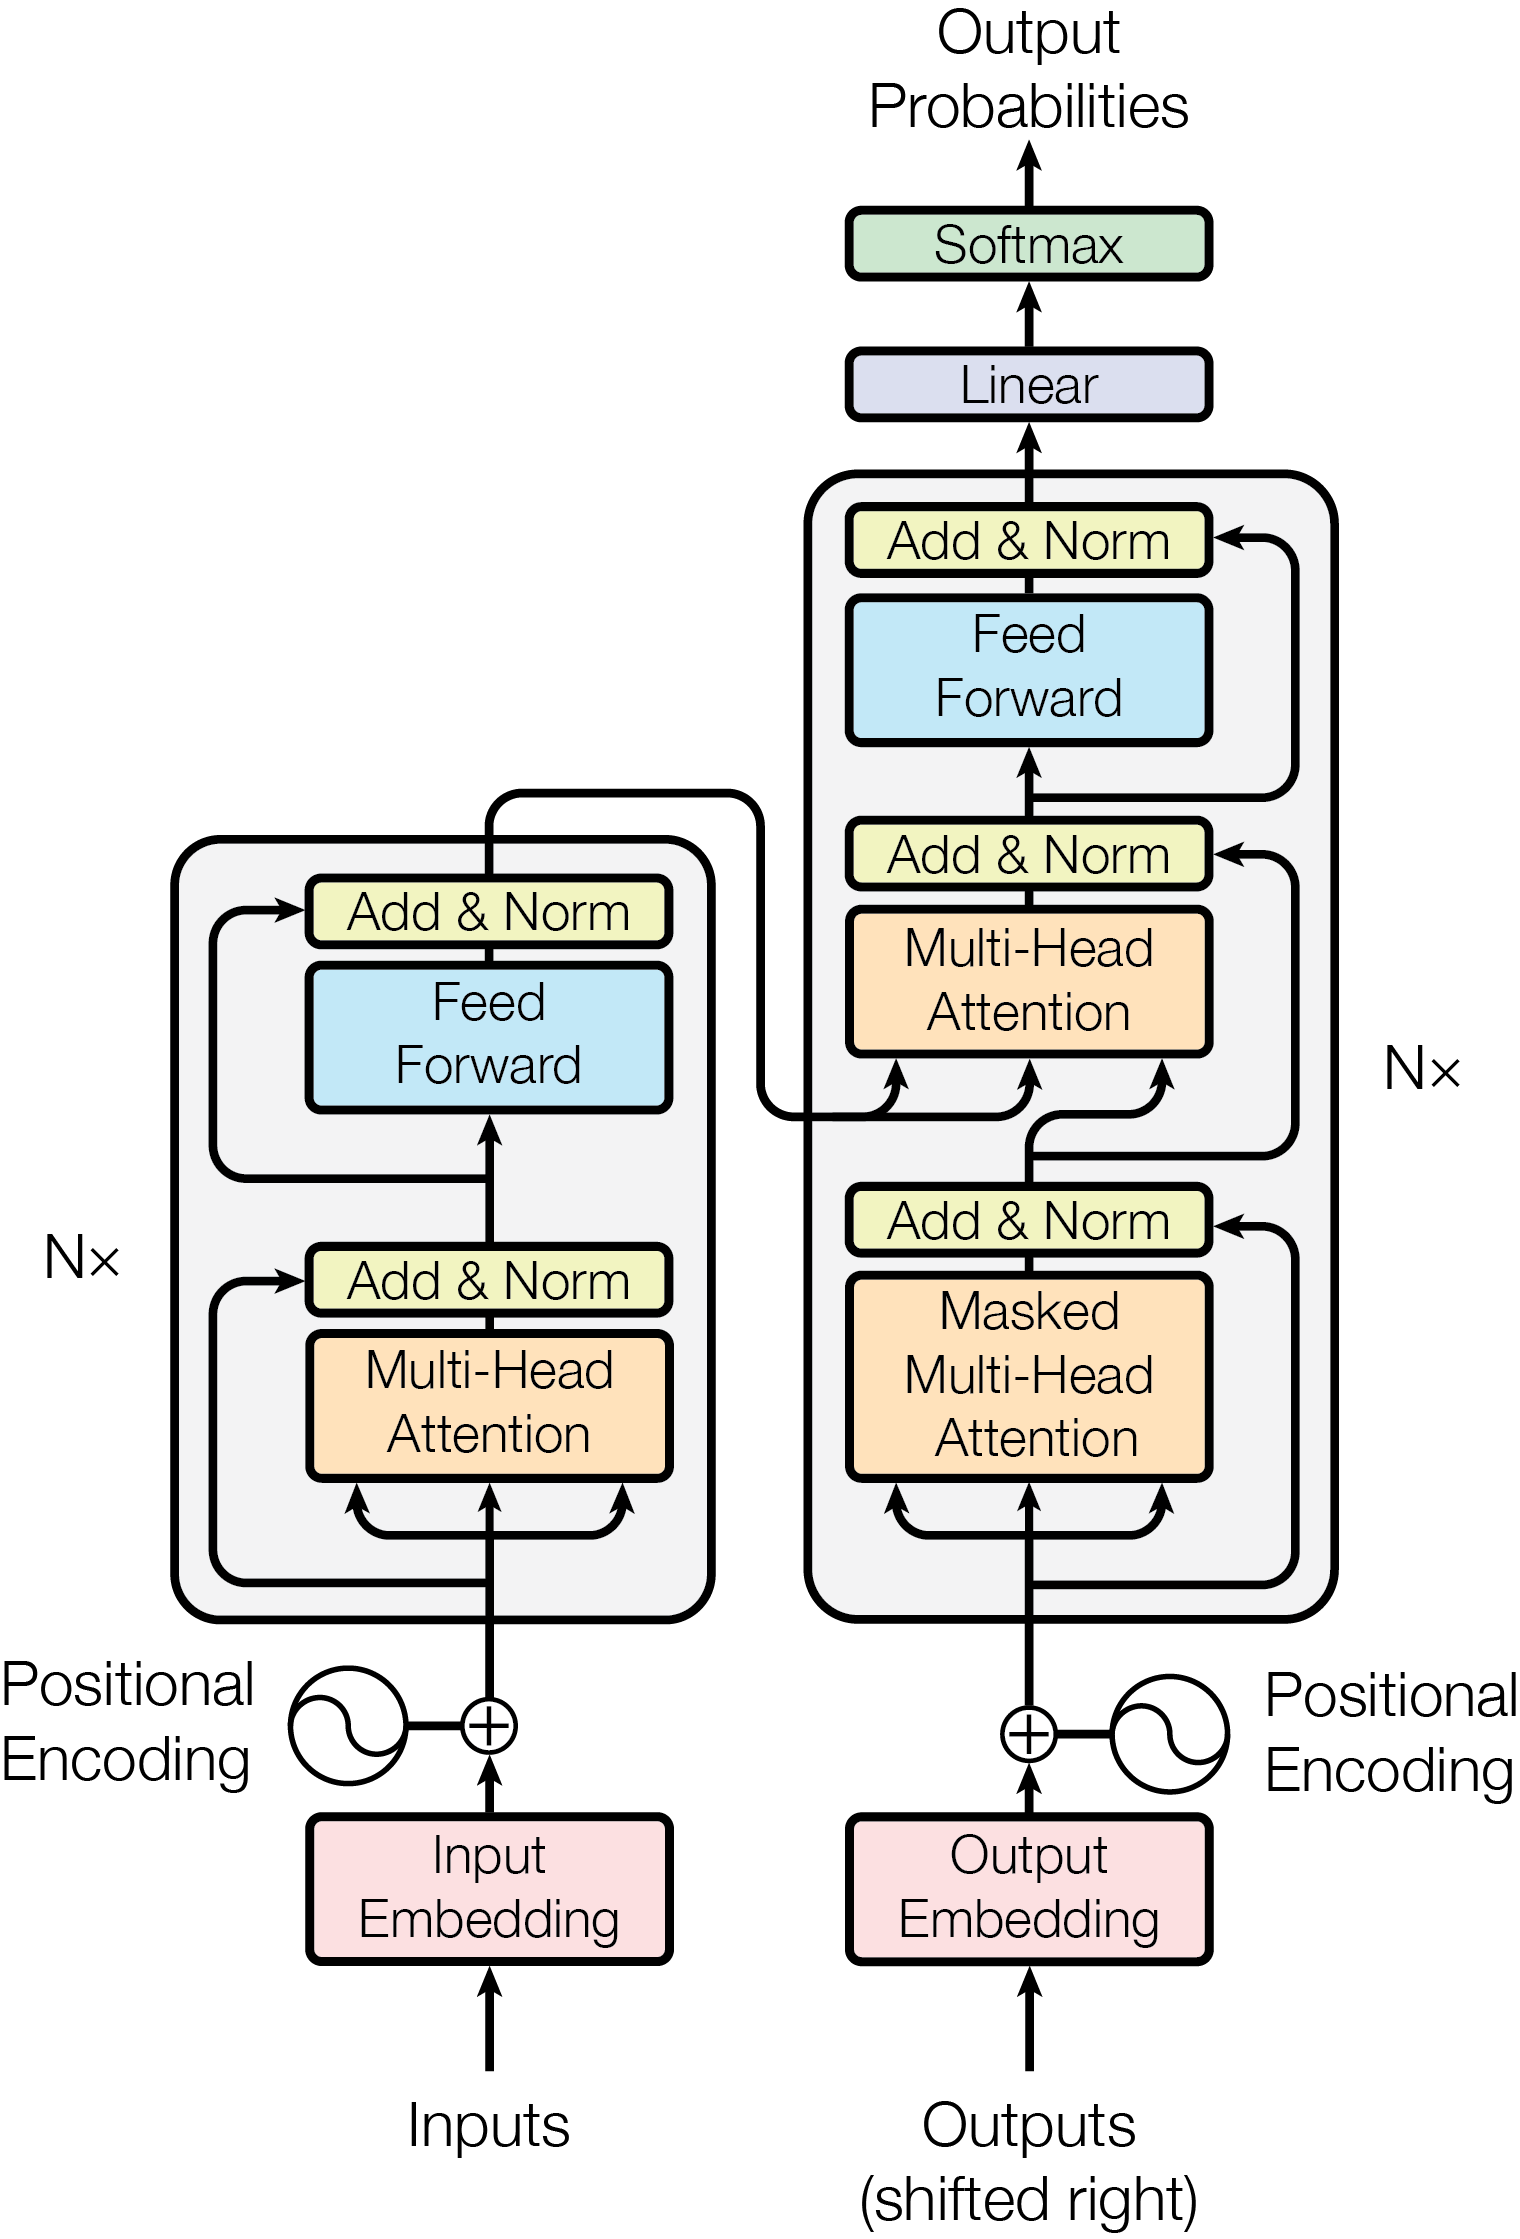

In [ ]:
from IPython.display import Image
Image(filename=json_list[page_number]['images'][0]['path'],width=500,height=500)

In [ ]:
json_list[page_number]['items']

[{'type': 'text',
  'value': '```markdown',
  'md': '```markdown',
  'bBox': {'x': 0, 'y': 0, 'w': 612}},
 {'type': 'heading',
  'lvl': 1,
  'value': 'The Transformer Model Architecture',
  'md': '# The Transformer Model Architecture',
  'bBox': {'x': 0, 'y': 0, 'w': 612}},
 {'type': 'heading',
  'lvl': 2,
  'value': 'Figure 1: The Transformer - Model Architecture',
  'md': '## Figure 1: The Transformer - Model Architecture',
  'bBox': {'x': 0, 'y': 0, 'w': 612}},
 {'type': 'text',
  'value': '![The Transformer Model Architecture](<image_placeholder>)\nThe Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively.',
  'md': '![The Transformer Model Architecture](<image_placeholder>)\nThe Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, show